In [1]:
%matplotlib inline

In [2]:
%run notebook_setup

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


theano version: 1.0.4


pymc3 version: 3.7


exoplanet version: 0.2.4.dev6+g2171caa


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


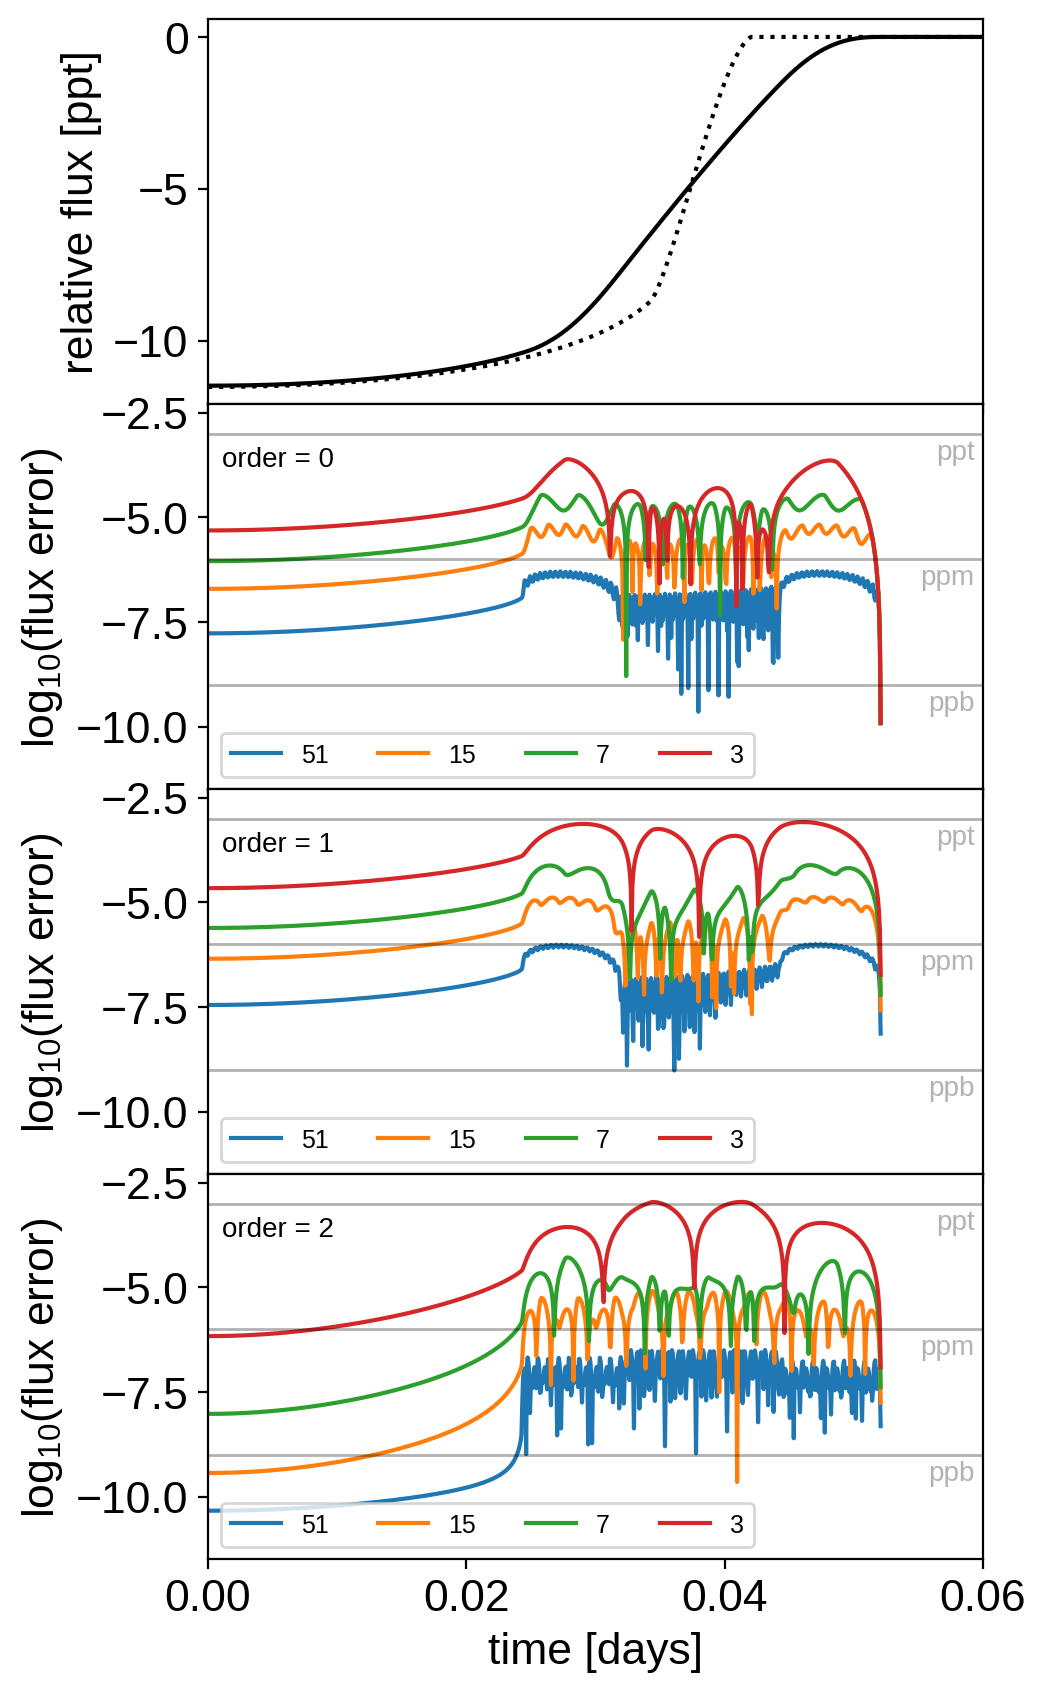

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import exoplanet as xo

# The light curve calculation requires an orbit
orbit = xo.orbits.KeplerianOrbit(period=1, ecc=0.01, omega=0.0)

# Compute a limb-darkened light curve using starry
texp = 0.02
t = np.linspace(0.0, 0.06, 1000)
u = [0.3, 0.2]
star = xo.LimbDarkLightCurve(u)
light_curve_instant = star.get_light_curve(orbit=orbit, r=0.1, t=t).eval()
light_curve_exact = star.get_light_curve(
    orbit=orbit, r=0.1, t=t, texp=texp, oversample=1000
).eval()

fig, axes = plt.subplots(4, 1, figsize=(5, 10), sharex=True)

ax = axes[0]
ax.plot(t, light_curve_instant * 1e3, ":k")
ax.plot(t, light_curve_exact * 1e3, "k")
ax.set_ylabel("relative flux [ppt]")

for n in [3, 7, 15, 51][::-1]:
    for order in range(3):
        ax = axes[order + 1]
        light_curve = star.get_light_curve(
            order=order, orbit=orbit, r=0.1, t=t, texp=texp, oversample=n
        ).eval()
        ax.plot(
            t, np.log10(np.abs(light_curve - light_curve_exact)), label="{0}".format(n)
        )

# integrated = xo.IntegratedLimbDarkLightCurve(u)
# ax = axes[-1]
# for tol in [-5, -4, -3, -2]:
#     light_curve, num_eval = theano.function([], integrated.get_light_curve(
#         orbit=orbit, r=0.1, t=t, texp=texp, tol=10**tol, return_num_eval=True))()
#     ax.plot(t, np.log10(np.abs(light_curve - light_curve_exact)),
#             label="$10^{{{0}}},\,{1:.0f}$".format(tol, num_eval/len(t)), zorder=-tol)

for i, ax in enumerate(axes[1:]):
    if i <= 2:
        ax.annotate(
            "order = {0}".format(i),
            (0, 1),
            xycoords="axes fraction",
            ha="left",
            va="top",
            xytext=(5, -15),
            textcoords="offset points",
            fontsize=10,
        )

    for loc, name in [(-3, "ppt"), (-6, "ppm"), (-9, "ppb")]:
        ax.axhline(loc, color="k", alpha=0.3, lw=1)
        ax.annotate(
            name,
            (t.max(), loc),
            va="top",
            ha="right",
            xytext=(-3, -2),
            textcoords="offset points",
            fontsize=10,
            alpha=0.3,
        )
    ax.set_ylim(-11.5, -2.3)
    ax.set_ylabel("log$_{10}$(flux error)")
    ax.legend(fontsize=9, ncol=4, loc=3)

ax.set_xlabel("time [days]")
ax.set_xlim(t.min(), t.max())
fig.subplots_adjust(hspace=0.0);